In [73]:
function DoubPen(x)
    #this function defines the motion of a double pendulum using the Lagrangian
    #x = [θ1 θ2 ω1 ω2]
    #I need to definel1,l2,m1,m2
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    dx = zeros(4)
    dx[1] = x[3]
    dx[2] = x[4]
    dx[3] = (sin(x[1]-x[2])*(l1*cos(x[1]-x[2])*x[3]^2+x[4]^2))/(2*l1*(1+m1-cos(x[1]-x[2])^2))-(((1+2*m1)*sin(x[1])+sin(x[1]-x[2]))/(l1*(1+m1-cos(x[1]-x[2])^2)))
    dx[4] = sin(x[1]-x[2])*(((1+m1)*(cos(x[1])+l1)+cos(x[1]-x[2])*x[4]^2/(1+m1-cos(x[1]-x[2])^2)))
end

DoubPen (generic function with 2 methods)

In [48]:
function rungekutta4(f, y₀, Δt, t₀, t₁) 
   
    # fix up Δt so it evenly divides time interval
    N = convert(Int64, round((t₁ - t₀)/Δt))
    Δt = (t₁ - t₀)/N
    Δt2 = Δt/2
    Δt6 = Δt/6
    
    t = linspace(t₀, t₁, N+1)

    y = zeros(N+1, length(y₀))
    y[1,:] = y₀

    for n = 1:N
        yn = y[n,:]
        tn = t[n]
        s1 = f(tn, yn)
        s2 = f(tn + Δt2, yn + Δt2*s1)
        s3 = f(tn + Δt2, yn + Δt2*s2)
        s4 = f(tn + Δt,  yn + Δt *s3)

        y[n+1, :] =  yn + Δt6*(s1+2s2 + 2s3 + s4) # RK4 update formula
    end
    t,y
end



rungekutta4 (generic function with 1 method)

In [49]:
using NLsolve
using OrdinaryDiffEq
using Plots

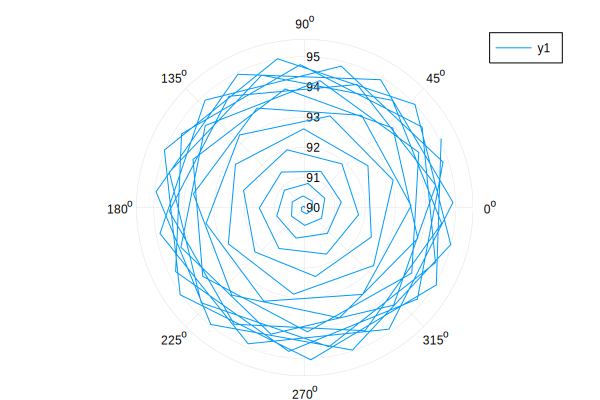

In [59]:
x = [180,90,0,0];
Δt=0.01;
t1=0;
t2=1;
t,y = rungekutta4(DoubPen,x,Δt,t1,t2);
plot(y[:,1], proj = :polar)
plot(y[:,2], proj = :polar)

In [ ]:
#plot T v t of the difference of integration and initial condition
function g(x)
    
    
end

In [60]:
function Newton(f, x0, n)
    x = copy(x0)
    x0 = copy(x0)
    fx0 = f(x0)
    m = length(fx0)
    ϵ = 0.0001
    df = zeros(m,m)
    n = copy(n)
    cnt = 0
    
    for Niterations = 1:n
        #here the derivative is calculated numerically
        for j = 1:m
            x_ϵ = copy(x0)
            
            x_ϵ[j] += ϵ
        
            fx_ϵ = f(x_ϵ)
        
            for i = 1:m
                df[i,j] = (fx_ϵ[i] - fx0[i])/ϵ
            end
        end
        #the newton search will be computed here
        
        Δx = -df\fx0
        
        x0 += Δx
        
        cnt = cnt + 1
        
        fx0 = f(x0)
        @show fx0
    end
    x0, fx0, cnt
end

Newton (generic function with 1 method)

In [75]:
x0 = [pi,pi/2,0,0]
Newton(DoubPen,x0,10)

LoadError: [91mMethodError: no method matching /(::Float64, ::Array{Float64,2})[0m
Closest candidates are:
  /(::Float64, [91m::Float64[39m) at float.jl:381
  /(::R<:Real, [91m::S<:Complex[39m) where {R<:Real, S<:Complex} at complex.jl:278
  /(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:356
  ...[39m

In [5]:
2^2

4

In [6]:
cos(
    pi)^2

1.0

In [7]:
w = sin(pi/2)-
cos(pi)
w

2.0

In [8]:
x = [2,2]
x[1]*x[2]

4